In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../")

In [5]:
import pandas as pd
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change
import deepmatcher as dm
import torch

In [6]:
attributes =['Beer_Name','Brew_Factory_Name','Style','ABV']

In [7]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('../models/beer_hybrid.pth')
model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Beer_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [8]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../Structured/Beer/'
                                                                         ,'negatives.csv',32,model,
                                                                        model.classifier)

In [35]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../Structured/Beer',
                                                                       'positives.csv',32,model,
                                                                       model.classifier)

In [36]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [11]:
attribute_length = int((300*3)/len(attributes))
classifier_length = int(attribute_length*len(attributes))

In [16]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Proces

Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Pr

In [17]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [18]:
negatives_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)

In [19]:
negatives_variation_df.head(10)

,Beer_Name,Brew_Factory_Name,Style,ABV
0,1.756666,1.892637,2.737366,2.571420
1,4.071639,4.359932,5.790083,5.699150
2,1.728421,1.847335,2.664314,2.526017
3,4.321639,4.555098,5.862378,5.902045
4,2.579577,2.528486,2.952510,2.983584
5,1.537470,1.695223,2.586870,2.404114
6,8.642093,8.260531,9.421063,9.415255
7,5.656384,5.488816,6.167542,6.223053
8,4.945005,5.181993,5.946332,6.071218
9,5.573010,5.407985,6.118298,6.131685


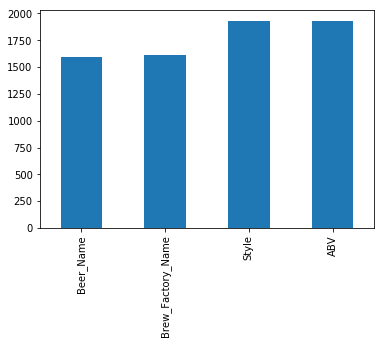

In [19]:
ri_sums = negatives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

In [37]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

In [38]:
ri_norms_positives = []
for ri_list in positives_ri_matrix:
    ri_norms_positives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [39]:
positives_variation_df = pd.DataFrame(data= ri_norms_positives,columns=attributes)

In [40]:
positives_variation_df.head(10)

,Beer_Name,Brew_Factory_Name,Style,ABV
0,4.135797,4.689711,7.199067,6.922161
1,4.207194,4.703021,7.182748,6.891631
2,2.756799,3.060487,4.720974,4.502593
3,2.767454,3.111465,4.774271,4.559710
4,0.000000,0.000000,0.000000,0.000000
5,5.838217,6.519960,10.164474,9.616017
6,0.000000,0.000000,0.000000,0.000000
7,5.928788,6.755553,10.214280,9.873559
8,6.321966,7.036819,10.805444,10.243447
9,6.673925,7.412299,11.534784,10.762147


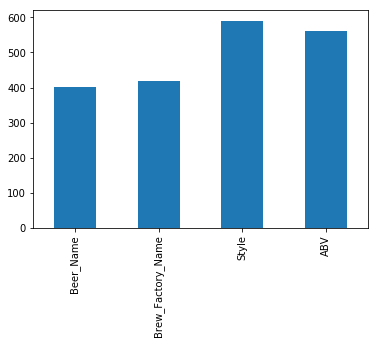

In [42]:
ri_sums = positives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

## Compute closer vectors

In [43]:
from utilities_functions.distance_measures import nearest_neighbour,nearest_neighbour_onAttribute

In [55]:
#lista di tuple: vettore più vicino considerando tutti gli elementi e closer solo secondo un attributo
negatives_closer_vectors = []
i = 0
for batch in negative_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+negatives_ri_matrix[i][attributes.index(att)]
                                                                ,positive_classifier_inputs,attributes.index(att),
                                                                attribute_length,'cosine'),attributes))
        negatives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [56]:
# per ogni attributo trovo il più vicino
positives_closer_vectors = []
i = 0
for batch in positive_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+positives_ri_matrix[i][attributes.index(att)]
                                                                ,negative_classifier_inputs,attributes.index(att),
                                                                attribute_length,'cosine'),attributes))
        positives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [47]:
positives_closer_vectors_df = pd.DataFrame(data= positives_closer_vectors,columns =attributes)
positives_closer_vectors_df = positives_closer_vectors_df.applymap(lambda c:neg_ids[c])

In [48]:
negatives_closer_vectors_df = pd.DataFrame(data = negatives_closer_vectors, columns = attributes)
negatives_closer_vectors_df = negatives_closer_vectors_df.applymap(lambda c:pos_ids[c])

In [64]:
positives_closer_vectors_df.head()

,Beer_Name,Brew_Factory_Name,Style,ABV
0,397,73,597,419
1,392,627,597,419
2,66,399,597,419
3,73,223,597,419
4,429,161,614,14


In [62]:
closer_negatives = positives_closer_vectors_df.Beer_Name.unique()

In [66]:
test_neg = pd.read_csv('../Structured/Beer/test_negatives.csv')

In [70]:
type(positives_closer_vectors_df['Beer_Name'][0])

str

In [63]:
nearest_neighbours_beername = pd.merge(positives_closer_vectors_df, test_neg, how='inner',left_on='Beer_Name',right_on='id')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat